In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")  

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv("/content/drive/My Drive/Movies_dataset/movies_metadata.csv")
df_2 = pd.read_csv("/content/drive/My Drive/Movies_dataset/ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_2.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
x=int(input("Enter Movie id corresponding to the movie name: "))

Enter Movie id corresponding to the movie name: 318


In [ ]:
df_2['newmovie_Id']=df_2['movieId']

In [ ]:
df_2

,userId,movieId,rating,timestamp,newmovie_Id
0,1,110,1.0,1425941529,110
1,1,147,4.5,1425942435,147
2,1,858,5.0,1425941523,858
3,1,1221,5.0,1425941546,1221
4,1,1246,5.0,1425941556,1246
...,...,...,...,...,...
26024284,270896,58559,5.0,1257031564,58559
26024285,270896,60069,5.0,1257032032,60069
26024286,270896,63082,4.5,1257031764,63082
26024287,270896,64957,4.5,1257033990,64957


In [ ]:
df_2.groupby('movieId')['rating'].mean().sort_values(ascending=False).head()

movieId
137078    5.0
134387    5.0
170683    5.0
170633    5.0
132900    5.0
Name: rating, dtype: float64

In [ ]:
df_2.groupby('movieId')['rating'].count().sort_values(ascending=False).head()

movieId
356     91921
318     91082
296     87901
593     84078
2571    77960
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(df_2.groupby('movieId')['rating'].mean())

In [ ]:
df_2.shape

(26024289, 5)

In [ ]:
df_3 = df_2.loc[0:2000000]

In [ ]:
ratings.head()

,rating
movieId,
1,3.888157
2,3.236953
3,3.175550
4,2.875713
5,3.079565


In [ ]:
ratings.shape

(45115, 1)

In [ ]:
ratings['num of ratings'] = pd.DataFrame(df_3.groupby('movieId')['rating'].count())

In [ ]:
ratings.head()

,rating,num of ratings
movieId,,
1,3.888157,5125.0
2,3.236953,1990.0
3,3.175550,1153.0
4,2.875713,198.0
5,3.079565,1178.0


In [ ]:
ratings.shape

(45115, 2)

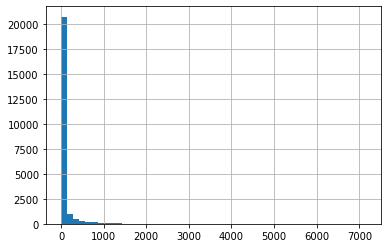

In [ ]:
ratings['num of ratings'].hist(bins=50)

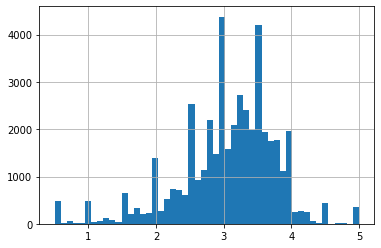

In [ ]:
ratings['rating'].hist(bins=50)

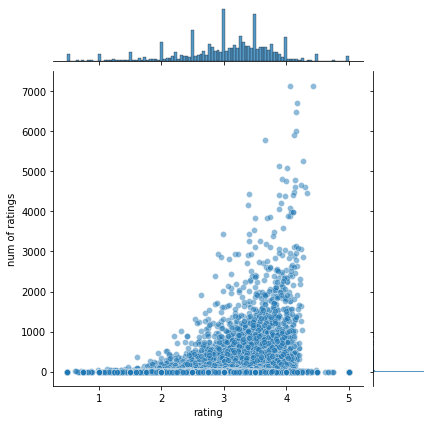

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
moviemat = df_3.pivot_table(index='userId',columns='newmovie_Id',values='rating')

In [ ]:
ratings.head()

,rating,num of ratings
movieId,,
1,3.888157,5125.0
2,3.236953,1990.0
3,3.175550,1153.0
4,2.875713,198.0
5,3.079565,1178.0


In [ ]:
ratings['num of ratings'].shape

(45115,)

In [ ]:
moviemat.loc[1]

newmovie_Id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
176047   NaN
176165   NaN
176211   NaN
176219   NaN
176271   NaN
Name: 1, Length: 23281, dtype: float64

In [ ]:
moviemat.head()

newmovie_Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,175555,175557,175559,175579,175589,175639,175687,175705,175745,175765,175771,175773,175775,175777,175779,175945,175975,176009,176011,176013,176015,176017,176019,176021,176023,176025,176029,176031,176033,176035,176037,176039,176041,176043,176045,176047,176165,176211,176219,176271
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
moviemat.shape

(20808, 23281)

In [ ]:
ratings.sort_values(['num of ratings'],ascending=False).head(10)

,rating,num of ratings
movieId,,
318,4.429015,7142.0
356,4.052926,7139.0
296,4.169975,6718.0
593,4.152246,6494.0
2571,4.154098,6023.0
260,4.132299,5923.0
480,3.660238,5789.0
527,4.266531,5260.0
1,3.888157,5125.0


In [ ]:
ratings.shape

(45115, 2)

In [ ]:
movie356_id_rate = moviemat[356]
movie318_id_rate = moviemat[318]

In [ ]:
movie356_id_rate.shape

(20808,)

In [ ]:
movie356_id_rate.head()


userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: 356, dtype: float64

In [ ]:
movie356_id_rate.isnull().sum()

13669

In [ ]:
similar_movie1 = moviemat.corrwith(movie356_id_rate)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_movie1.shape

(23281,)

In [ ]:
similar_movie2 = moviemat.corrwith(movie318_id_rate)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_movie1 = pd.DataFrame(similar_movie1,columns=['Correlation'])
corr_movie1.dropna(inplace=True)
corr_movie2 = pd.DataFrame(similar_movie2,columns=['Correlation'])
corr_movie2.dropna(inplace=True)

In [ ]:
corr_movie1.shape

(14563, 1)

In [ ]:
corr_movie1.dtype

Correlation    0
dtype: int64

In [ ]:
corr_movie1.sort_values('Correlation',ascending=False).head(10)

,Correlation
newmovie_Id,
176211,1.0
107130,1.0
105325,1.0
31290,1.0
31104,1.0
30994,1.0
30949,1.0
27840,1.0
27824,1.0


In [ ]:
corr_movie1 = corr_movie1.join(ratings['num of ratings'])


In [ ]:
corr_movie1.head()

,Correlation,num of ratings
newmovie_Id,,
1,0.266996,5125.0
2,0.299374,1990.0
3,0.257050,1153.0
4,0.242008,198.0
5,0.226888,1178.0


In [ ]:
corr_movie1[corr_movie1['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
newmovie_Id,,
356,1.000000,7139.0
828,0.550775,130.0
52319,0.472619,112.0
650,0.468854,123.0
5415,0.464550,114.0
3147,0.463849,2347.0
7155,0.462201,114.0
7347,0.452738,301.0
3219,0.449986,178.0


In [ ]:
corr_movie2 = corr_movie2.join(ratings['num of ratings'])

In [ ]:
corr_movie2[corr_movie2['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
newmovie_Id,,
318,1.000000,7142.0
5055,0.531573,176.0
828,0.526553,130.0
91485,0.519874,147.0
98243,0.501379,117.0
3310,0.485164,108.0
1006,0.482866,137.0
581,0.478310,142.0
1446,0.474522,189.0


In [ ]:
for i in range(1,176271):
  if i!=x:
    break
  if i==x:
    movie_id_rate = moviemat[i]
    similar_movie = moviemat.corrwith(movie_id_rate)
    corr_movie = pd.DataFrame(similar_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    print(corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head(10))